In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('WineQT.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

VOIR LES VARIABLES : ON SE CONCENTRE SUR ['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']

[[0.7    9.4    0.56   0.     3.51   0.9978 1.9    0.076 ]]
[5 5 5 ... 5 6 5]
1143
1143


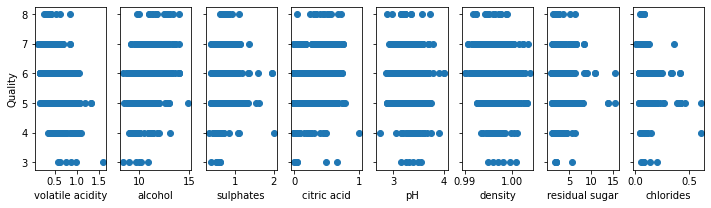

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# load the dataset

y_train = df['quality']
X_train= [df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid'],df['pH'],df['density'],df['residual sugar'],df['chlorides']]
X_features = ['volatile acidity','alcohol','sulphates','citric acid','pH','density','residual sugar','chlorides']
X_train=np.transpose(np.asmatrix(X_train))
nb_feature=len(X_features)
y_train=np.asarray(y_train)
print(X_train[:1])
print(y_train)
print(len(X_train))
print(len(y_train))
fig,ax=plt.subplots(1, nb_feature, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter([X_train[:,i]],[y_train])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Quality")
plt.show()

In [4]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 

In [8]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
print(X_norm)

X_mu = [[ 0.53133858 10.4421114   0.65770779  0.26836395  3.31101487  0.99673041
   2.53215223  0.08693263]], 
X_sigma = [[0.1795546  1.0817221  0.17032416 0.19659979 0.15659551 0.00192422
  1.3553242  0.04724666]]
Peak to Peak range by column in Raw        X:[[1.460e+00 6.500e+00 1.670e+00 1.000e+00 1.270e+00 1.362e-02 1.460e+01
  5.990e-01]]
Peak to Peak range by column in Normalized X:[[ 8.13123157  6.00893702  9.80483344  5.08647531  8.11006636  7.07817494
  10.77233036 12.67814579]]
[[ 0.93933222 -0.96338181 -0.57365783 ...  0.55585438 -0.46642142
  -0.23139486]
 [ 1.94181282 -0.59360107  0.1308811  ...  0.03616459  0.05006018
   0.23424656]
 [ 1.27349242 -0.59360107 -0.04525363 ...  0.14010255 -0.17128908
   0.10725344]
 ...
 [ 0.38239855  0.05351522 -0.45623467 ... -0.95124601 -0.39263833
   0.06492241]
 [ 0.10393172  0.70063152  0.60057372 ... -0.83691426 -0.24507216
  -0.52771212]
 [ 0.6330187  -0.22382033  0.30701583 ... -0.65502283 -0.39263833
  -0.25256038]]


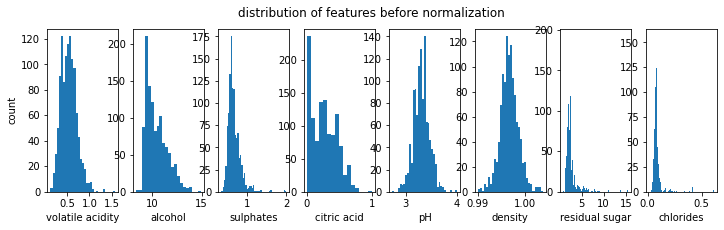

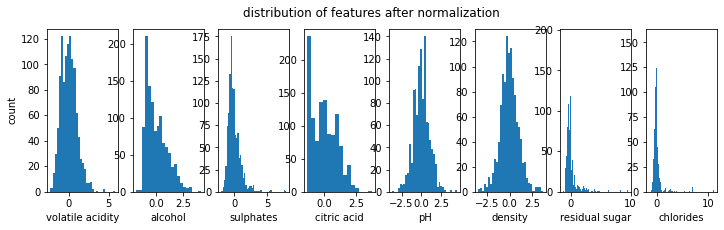

In [9]:
fig,ax=plt.subplots(1, nb_feature, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(X_train[:,i],bins='auto')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,nb_feature,figsize=(12,3))

for i in range(len(ax)):
    ax[i].hist(X_norm[:,i],bins='auto')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

modif jeu de données

(573,)
(573, 8)


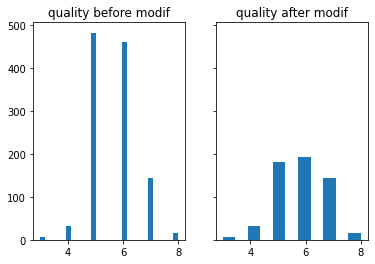

In [10]:
import random

fig,ax=plt.subplots(1,2,sharey=True)
ax[0].hist(df["quality"], bins='auto',label="quality")
ax[0].set_title("quality before modif")
supp=[]
#on supprime aleatoirement des valeurs de notes 5 et 6 (diviser par 3)
for i in range(len(y_train)):
    if y_train[i]==5 or y_train[i]==6:
        rand=random.random()
        if(rand>0.4):
            supp.append(i)
for j in range(len(supp)):
    y_train2=np.delete(y_train,supp)
    X_norm2=np.delete(X_norm,supp,0)


ax[1].hist(y_train2, bins='auto',label="quality")
ax[1].set_title("quality after modif")

print(y_train2.shape)
print(X_norm2.shape)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2023-04-20 15:05:30.118518: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-20 15:05:30.423432: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-20 15:05:30.425913: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15:05:32.881509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

In [12]:
x=np.array(X_norm2)
y=np.array(y_train2).reshape(-1,1)
print(x.shape, y.shape)

(573, 8) (573, 1)


In [13]:
Xt = np.tile(x,(100,1))
Yt= np.tile(y,(100,1))   
print(Xt.shape, Yt.shape)  

(57300, 8) (57300, 1)


In [14]:
tf.random.set_seed(1234)  
model = Sequential(
    [ 
        tf.keras.Input(shape=(nb_feature,)),
        Dense(25, activation = 'relu',name ="layer1"),
        Dense(15, activation = 'relu',name ="layer2"),
        Dense(9, activation = 'softmax',name ="layer3")    # < softmax activation here
    ]
)


2023-04-20 15:05:46.370299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                225       
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 9)                 144       
                                                                 
Total params: 759
Trainable params: 759
Non-trainable params: 0
_________________________________________________________________


In [16]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)


W1:
 [[ 0.19162995 -0.20380999 -0.23143105 -0.348997    0.29388648 -0.29779702
   0.36359495 -0.405724   -0.31918776  0.18398112  0.18452716  0.40862197
   0.3447247   0.19583988 -0.38398102 -0.31311333 -0.3049506   0.27032948
   0.06831169 -0.05690968  0.10742646  0.20251006 -0.16354299 -0.18415679
  -0.0034447 ]
 [ 0.03678721 -0.20976616 -0.16747081 -0.422202    0.39732242 -0.03123567
   0.30518657 -0.33775094 -0.10063452 -0.40941525 -0.06489807 -0.11436805
  -0.2647577   0.3228246   0.3037284   0.07745743  0.11998886  0.00671539
  -0.24857625  0.3787552  -0.34275147  0.05011266 -0.20237239  0.03353384
   0.3496589 ]
 [-0.18141568 -0.02608982  0.3595134  -0.28106236  0.28862733 -0.02359393
  -0.14694554 -0.14544979  0.4160329   0.25097954  0.01948079  0.1401782
   0.14945698 -0.16264316 -0.29145098 -0.090736   -0.18012732  0.09697449
   0.13246804 -0.13271815 -0.4237378   0.09280819  0.21946543 -0.15501264
  -0.1536836 ]
 [-0.2581154  -0.32239458 -0.01410794  0.03671646 -0.0062643   

In [17]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    Xt,Yt,
    epochs=10
)

Epoch 1/10
1791/1791 [==============================] - 8s 4ms/step - loss: 1.0520
Epoch 2/10
1791/1791 [==============================] - 6s 4ms/step - loss: 0.8426
Epoch 3/10
1791/1791 [==============================] - 6s 3ms/step - loss: 0.7500
Epoch 4/10
1791/1791 [==============================] - 7s 4ms/step - loss: 0.6729
Epoch 5/10
1791/1791 [==============================] - 7s 4ms/step - loss: 0.6038
Epoch 6/10
1791/1791 [==============================] - 6s 4ms/step - loss: 0.5440
Epoch 7/10
1791/1791 [==============================] - 6s 4ms/step - loss: 0.4950
Epoch 8/10
1791/1791 [==============================] - 7s 4ms/step - loss: 0.4547
Epoch 9/10
1791/1791 [==============================] - 6s 4ms/step - loss: 0.4201
Epoch 10/10
1791/1791 [==============================] - 6s 4ms/step - loss: 0.3877


TEST DU RESULTAT

In [18]:
def locateMax(tab):
    max=0
    for loop in range(len(tab)):
        if tab[loop]>tab[max]:
            max=loop
    return max

In [21]:
X_test = np.array([
    [1,5,1,0,2,1,3,1],  # postive example
    ])   # negative example
norm_l = tf.keras.layers.Normalization(axis=-1)

X_testn = norm_l(X_test)

p_nonpreferred = model.predict(X_test)
print(p_nonpreferred [:2][0])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))
print("position du max : ",locateMax(p_nonpreferred [:2][0]))
w_final=W2
b_final=b2



1/1 [==============================] - 0s 190ms/step
[6.8307842e-22 6.7555606e-21 1.5948475e-20 7.8239179e-37 1.2818883e-07
 7.8591782e-09 1.2646273e-02 9.8324573e-01 4.1079270e-03]
largest value 0.98324573 smallest value 7.823918e-37
position du max :  7


18/18 [==============================] - 0s 4ms/step


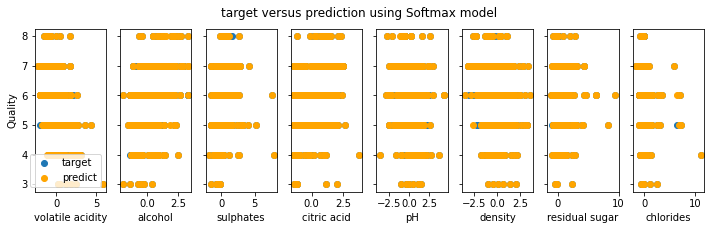

In [23]:
#predict target using normalized features
m = x.shape[0]
yp = np.zeros(m)
predictions = model.predict(x)
for loop in range(len(predictions)):
    yp[loop]=locateMax(predictions[loop])

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,nb_feature,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter([x[:,i]],y, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter([x[:,i]],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Quality"); ax[0].legend()
fig.suptitle("target versus prediction using Softmax model")
plt.show()

In [24]:
sum=0
for loop in range(556):
    if(yp[loop] == y[loop]):
        sum+=1
print('Train Accuracy: ',(sum/556)*100)

Train Accuracy:  85.79136690647482


prévisions sur tout le dataset

(1143, 8) (1143, 1)
36/36 [==============================] - 0s 4ms/step


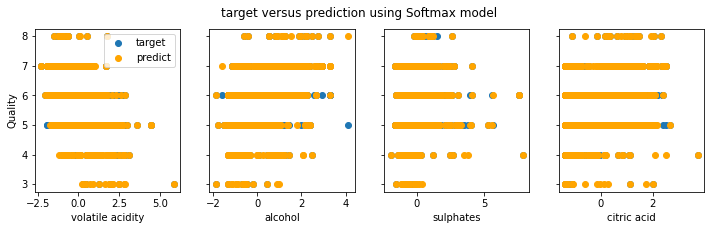

In [25]:
x_all=np.array(X_norm)
y_all=np.array(y_train).reshape(-1,1)
print(x_all.shape, y_all.shape)


m = x_all.shape[0]
yp_all = np.zeros(m)
predictions = model.predict(x_all)
for loop in range(len(predictions)):
    yp_all[loop]=locateMax(predictions[loop])

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter([x_all[:,i]],y_all, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter([x_all[:,i]],yp_all,color="orange", label = 'predict')
ax[0].set_ylabel("Quality"); ax[0].legend()
fig.suptitle("target versus prediction using Softmax model")
plt.show()

In [26]:
sum=0
for loop in range(556):
    if(yp_all[loop] == y_all[loop]):
        sum+=1
print('Train Accuracy: ',(sum/556)*100)

Train Accuracy:  67.44604316546763
